In [3]:
# Importar librerias a utilizar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargo el dataset en memoria
dataset__route = "data/hyperplane.csv"
dataset_df = pd.read_csv(dataset__route)

# 5 primeros registros del dataset
dataset_df.head()

,x,y,color
0,237.491363,136.898504,1
1,180.470910,202.233104,0
2,213.905287,310.329493,1
3,183.713515,172.680302,1
4,244.125483,214.833692,1


In [4]:
# Normalizo los valores de las variables x e y del dataset 
## Instancio un objeto de la clase MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_df[['x', 'y']])
X

array([[0.8022033 , 0.25125948],
       [0.49206523, 0.44625588],
       [0.67391705, 0.7688783 ],
       ...,
       [0.86025428, 0.43410747],
       [0.88303886, 0.30539492],
       [0.1937897 , 0.62240976]])

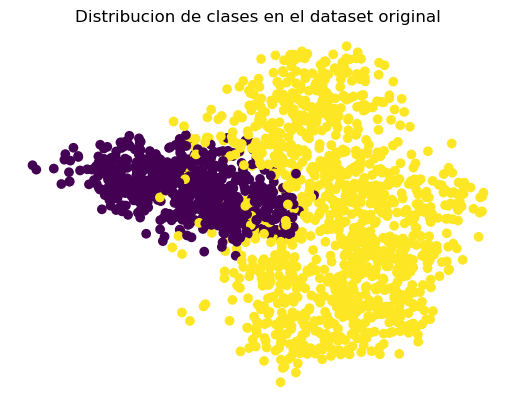

In [7]:
# Represento los valores normalizados del dataset en un eje bidimensional
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = dataset_df['color'])
plt.title('Distribucion de clases en el dataset original')
plt.axis('off')
#plt.grid(True)
plt.show()

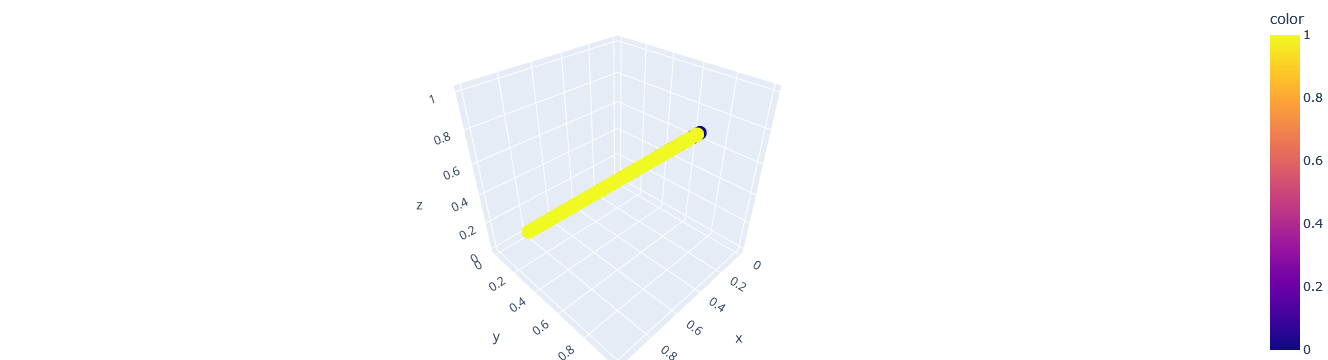

In [20]:
# Represento el dataset en un eje tridimensional
fig = px.scatter_3d(X, X[:, 0], X[:, 1], X[:, 1], color = dataset_df['color'])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

En el dataset que tratamos en el notebook actual, debido a la presencia de puntos pertenecientes a una clase dada dentro del espacio de caracteristicas de otra clase, por lo que es probable que no obtengamos un resultado 100% exacto al momento de agrupacion de los puntos que se encuentran en nuestro dataset..

In [43]:
## Entreno al modelo de clustering
from sklearn.cluster import DBSCAN

eps = 0.02738
model = DBSCAN(eps = eps)

# Entreno el modelo
model.fit(X)

DBSCAN(eps=0.02738)

In [44]:
## Etiquetas asignadas a los puntos del dataset
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

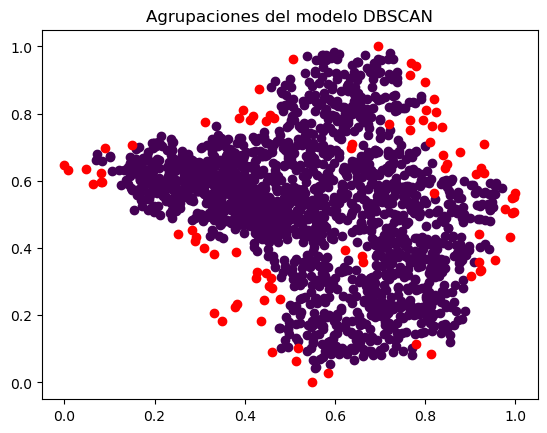

In [46]:
## Represento las agrupaciones del modelo DBSCAN
valid_labels = [label for label in labels if label != -1]
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(valid_labels)))


plt.figure()
for _ in range(len(valid_labels)):
    plt.scatter(X[labels == _][:, 0], X[labels == _][:, 1], c = [colors[_]])

# Anomalos
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c = 'red')
plt.title('Agrupaciones del modelo DBSCAN')
plt.show()